In [1]:
import pandas as pd
from lets_plot import *


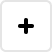
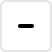
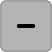
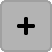
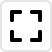
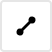
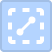
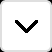
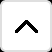
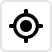
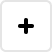
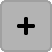
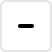
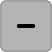
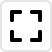
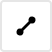
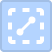
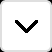
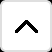
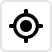

In [2]:
LetsPlot.setup_html()

In [3]:
def dump_plot(plot, display=None):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True
    
    if display:
        print(plot_json)

    return plot

In [4]:
plot_data = pd.DataFrame.from_records([
    ("pet", "cat", 5, "carnivore\nanimal"),
    ("pet", "dog", 10, "carnivore\nanimal"),
    ("pet", "rabbit", 2, "herbivore"),
    ("pet", "hamster", 1, "herbivore"),

    ("is\nfarm\nanimal", "cow", 500, "herbivore"),
    ("is\nfarm\nanimal", "pig", 100, "carnivore\nanimal"),
    ("is\nfarm\nanimal", "horse", 700, "herbivore"),
])
plot_data.columns = ("animal_type", "animal", "weight", "diet")

In [5]:
plot = (
    ggplot(plot_data, aes(x="animal", y="weight"))
    + geom_bar(stat="identity")
    + theme_bw() 
    + theme(panel_grid_minor=element_blank()
    )
)

#### Two facets

In [6]:
plot + facet_grid(x = "animal_type", scales="free")

In [7]:
plot + facet_wrap(facets="animal_type", ncol=1, scales="free")

#### Four facets

In [8]:
plot + facet_grid(x="animal_type", y="diet", scales="free")

In [9]:
plot + facet_wrap(facets=["animal_type", "diet"], scales="free")

In [10]:
plot + facet_wrap(facets=["animal_type", "diet"], ncol=4, scales="free")

In [11]:
# Three subtitles:

# Проблема - смещение для области геомов считается по первому столбцу - а здесь он меньге чем последний

plot + facet_wrap(facets=[ "diet", "animal_type","animal"], 
                  ncol=6, 
                 # scales="free_y"
                 ) + ggsize(1000,1000)

## Y-orientation

In [12]:
plot_y = (
    ggplot(plot_data, aes(x="weight", y="animal"))
    + geom_bar(stat="identity", orientation="y")
    + theme_bw()
    + theme(panel_grid_minor=element_blank())
)

#### Two facets

In [13]:
plot_y + facet_grid(y = "animal_type", scales="free")

In [14]:
plot_y + facet_wrap(facets="animal_type", ncol=2, scales="free")

#### Four facets

In [15]:
plot_y + facet_grid(y="animal_type", x="diet", scales="free")

In [16]:
plot_y + facet_wrap(facets=["animal_type", "diet"], ncol=2, scales="free")

In [17]:
plot_y + facet_wrap(facets=["animal_type", "diet"], ncol=4, scales="free")

In [18]:
plot_y + facet_wrap(facets=[ "diet", "animal_type","animal"], 
                    ncol=6, 
                   # scales="free_x"
                   ) + ggsize(1000,1000)

## Margins

In [19]:
with_margins = theme(strip_text = element_text(margin = [10, 10, 25, 25]))

In [20]:
plot + facet_grid(x="animal_type", y="diet") + with_margins

In [21]:
with_text_just = theme(strip_text = element_text(hjust = 0.02, vjust = 0))

plot + facet_grid(x="animal_type", y="diet") + with_margins + with_text_just